
Processing input file: retail1.txt
Running tests for support = 0.5%
Apriori at 0.5% support took 53257 ms
FPGrowth_itemsets at 0.5% support took 525 ms
Eclat at 0.5% support took 706 ms
Running tests for support = 1%
Apriori at 1% support took 12350 ms
FPGrowth_itemsets at 1% support took 461 ms
Eclat at 1% support took 572 ms
Running tests for support = 2%
Apriori at 2% support took 2631 ms
FPGrowth_itemsets at 2% support took 518 ms
Eclat at 2% support took 561 ms
Running tests for support = 3%
Apriori at 3% support took 1131 ms
FPGrowth_itemsets at 3% support took 511 ms
Eclat at 3% support took 546 ms
Running tests for support = 5%
Apriori at 5% support took 616 ms
FPGrowth_itemsets at 5% support took 484 ms
Eclat at 5% support took 543 ms
Running tests for support = 7%
Apriori at 7% support took 429 ms
FPGrowth_itemsets at 7% support took 458 ms
Eclat at 7% support took 531 ms

Processing input file: retail2.txt
Running tests for support = 0.5%
Apriori at 0.5% support took 17173 

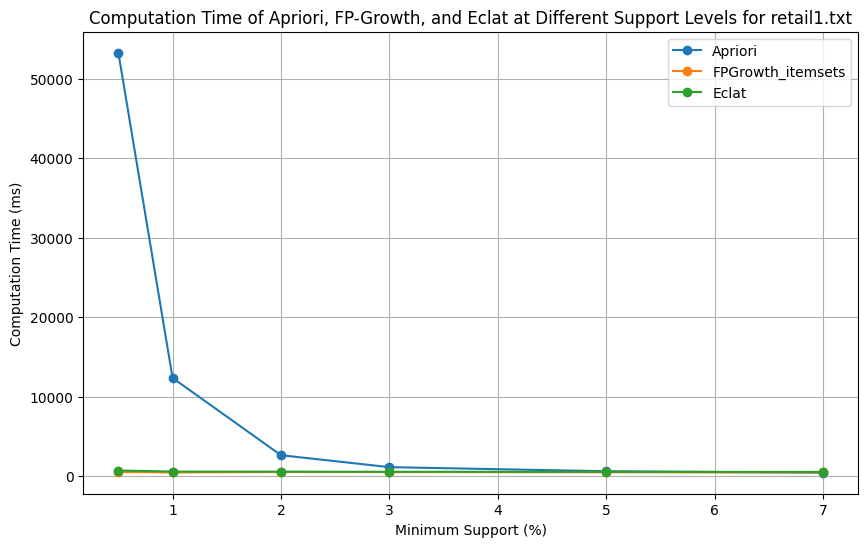

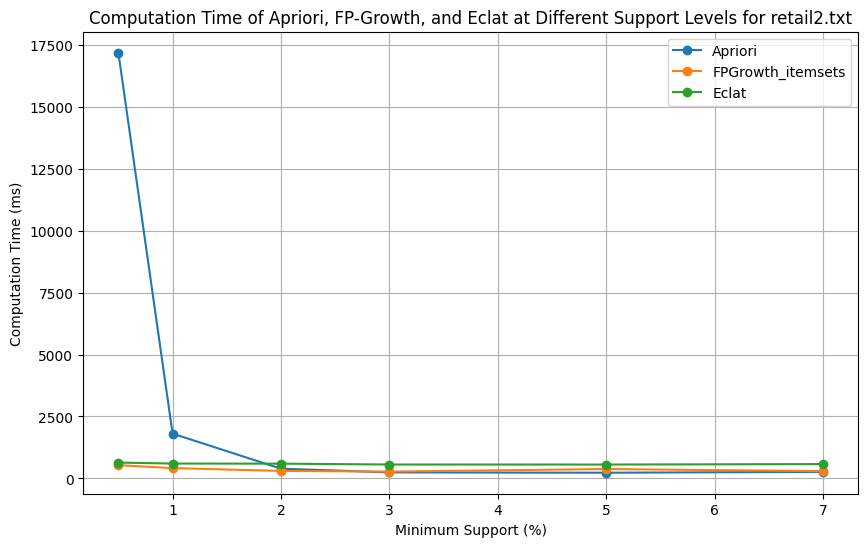

In [1]:
import subprocess
import re
import matplotlib.pyplot as plt

# Paths to files and configurations
spmf_jar_path = "spmf.jar"  # Path to the spmf.jar
input_files = ["retail1.txt", "retail2.txt"]  # Input files for comparison
output_file = "output.txt"  # Temporary output file; SPMF will write here
algorithms = ["Apriori", "FPGrowth_itemsets", "Eclat"]
min_supports = [0.5, 1, 2, 3, 5, 7]  # Support thresholds in percentage

# Dictionary to store computation times for each file and algorithm
results = {input_file: {alg: [] for alg in algorithms} for input_file in input_files}

# Function to run a command and parse time
def run_spmf_command(algorithm, support, input_file):
    # Build the command with placeholders for algorithm and support threshold
    command = [
        "java", "-jar", spmf_jar_path, "run", algorithm,
        input_file, output_file, f"{support}%"
    ]
    
    # Run the command and capture the output
    result = subprocess.run(command, capture_output=True, text=True)
    output = result.stdout
    
    # Regex to find total time in milliseconds
    match = re.search(r"Total time ~ (\d+) ms", output)
    if match:
        time = int(match.group(1))
    else:
        time = None
    return time

# Run each algorithm at each minimum support threshold for both files
for input_file in input_files:
    print(f"\nProcessing input file: {input_file}")
    for support in min_supports:
        print(f"Running tests for support = {support}%")
        for algorithm in algorithms:
            time = run_spmf_command(algorithm, support, input_file)
            if time is not None:
                results[input_file][algorithm].append(time)
                print(f"{algorithm} at {support}% support took {time} ms")
            else:
                print(f"Failed to get time for {algorithm} at {support}% support")

# Plotting the results
for input_file in input_files:
    plt.figure(figsize=(10, 6))
    for algorithm, times in results[input_file].items():
        plt.plot(min_supports, times, marker='o', label=algorithm)

    plt.xlabel("Minimum Support (%)")
    plt.ylabel("Computation Time (ms)")
    plt.title(f"Computation Time of Apriori, FP-Growth, and Eclat at Different Support Levels for {input_file}")
    plt.legend()
    plt.grid()
    plt.show()



In [2]:
import subprocess
import re

# Paths to files and configurations
spmf_jar_path = "spmf.jar"  # Update with the path to your spmf.jar
input_files = ["retail1.txt", "retail2.txt"]  # List of input files
output_file = "output.txt"  # Temporary output file; SPMF will write here
algorithms = ["FPGrowth_itemsets", "FPClose", "FPMax"]
min_supports = [0.5, 1, 2, 3, 5, 7]  # Support thresholds in percentage

# Dictionary to store computation times and itemset counts for each algorithm and file
results = {file: {alg: {"time": [], "itemsets": []} for alg in algorithms} for file in input_files}

# Function to run a command, parse time, and count itemsets
def run_spmf_command(algorithm, support, input_file):
    # Build the command with placeholders for algorithm, support threshold, and input file
    command = [
        "java", "-jar", spmf_jar_path, "run", algorithm,
        input_file, output_file, f"{support}%"
    ]
    
    # Run the command and capture the output
    result = subprocess.run(command, capture_output=True, text=True)
    output = result.stdout
    
    # Regex to find total time in milliseconds
    match = re.search(r"Total time ~ (\d+) ms", output)
    if match:
        time = int(match.group(1))
    else:
        time = None
    
    # Count the number of lines in the output file for itemset count
    with open(output_file, "r") as f:
        itemset_count = sum(1 for line in f)
    
    return time, itemset_count

# Run each algorithm at each minimum support threshold for each input file
for input_file in input_files:
    print(f"\nRunning tests for input file = {input_file}")
    for support in min_supports:
        print(f"  Support = {support}%")
        for algorithm in algorithms:
            time, itemset_count = run_spmf_command(algorithm, support, input_file)
            if time is not None:
                results[input_file][algorithm]["time"].append(time)
                results[input_file][algorithm]["itemsets"].append(itemset_count)
                print(f"    {algorithm} at {support}% support took {time} ms and generated {itemset_count} itemsets")
            else:
                print(f"    Failed to get time for {algorithm} at {support}% support")

# Displaying the results in a table format for each input file
for input_file in input_files:
    print(f"\nResults Table for {input_file}:\n")
    header = ["Algorithm", "min-sup = 0.5%", "", "min-sup = 1%", "", "min-sup = 2%", "", "min-sup = 3%", "", "min-sup = 5%", "", "min-sup = 7%", ""]
    subheader = ["", "Time", "#itemsets", "Time", "#itemsets", "Time", "#itemsets", "Time", "#itemsets", "Time", "#itemsets", "Time", "#itemsets"]
    print("{:<18} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(*header))
    print("{:<18} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(*subheader))
    
    for algorithm in algorithms:
        row = [algorithm]
        for i in range(len(min_supports)):
            row.extend([results[input_file][algorithm]["time"][i], results[input_file][algorithm]["itemsets"][i]])
        print("{:<18} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(*row))




Running tests for input file = retail1.txt
  Support = 0.5%
    FPGrowth_itemsets at 0.5% support took 612 ms and generated 396 itemsets
    FPClose at 0.5% support took 618 ms and generated 323 itemsets
    FPMax at 0.5% support took 600 ms and generated 175 itemsets
  Support = 1%
    FPGrowth_itemsets at 1% support took 569 ms and generated 140 itemsets
    FPClose at 1% support took 599 ms and generated 131 itemsets
    FPMax at 1% support took 560 ms and generated 80 itemsets
  Support = 2%
    FPGrowth_itemsets at 2% support took 516 ms and generated 45 itemsets
    FPClose at 2% support took 519 ms and generated 45 itemsets
    FPMax at 2% support took 528 ms and generated 33 itemsets
  Support = 3%
    FPGrowth_itemsets at 3% support took 507 ms and generated 24 itemsets
    FPClose at 3% support took 524 ms and generated 24 itemsets
    FPMax at 3% support took 514 ms and generated 18 itemsets
  Support = 5%
    FPGrowth_itemsets at 5% support took 490 ms and generated 10 ite

In [3]:
import subprocess
import re

def run_spmf_command(algorithm, support, input_file, output_file):
    # Build the command with placeholders for algorithm and support threshold
    command = [
        "java", "-jar", "spmf.jar", "run", algorithm,
        input_file, output_file, f"{support}%"
    ]
    
    # Run the command and capture the output
    result = subprocess.run(command, capture_output=True, text=True)
    output = result.stdout
    


def parse_output(output_file):
    itemset_support_map = []
    with open(output_file, 'r') as file:
        for line in file:
            # Split the line to separate itemset and support count
            parts = line.split("#SUP:")
            itemset_str = parts[0].strip()  # Itemset part (items separated by spaces)
            support = int(parts[1].strip())  # Support count as integer
            
            # Convert itemset to a sorted list of integers
            itemset = sorted(map(int, itemset_str.split()))
            
            # Append (itemset, support) to list
            itemset_support_map.append((itemset, support))
    itemset_support_map.sort(key=lambda x: x[1], reverse=True)
    
    return itemset_support_map
   
run_spmf_command('FPGrowth_itemsets', 0.5, 'retail1.txt', 'output.txt')
parsed_data = parse_output('output.txt')

# Display parsed data
cannot_be_together = []
for itemset, support in parsed_data:
    if len(cannot_be_together) == 5:
        break
    if len(itemset) > 1:
        cannot_be_together.append(itemset)

must_have = []
for s in cannot_be_together:
    must_have.append(s[0])

cannot_be_together_pairs = []
for i in range(len(cannot_be_together)):
    for j in range(i + 1, len(cannot_be_together)):
        combined_set = set(cannot_be_together[i]) | set(cannot_be_together[j])  # Union of two sets
        cannot_be_together_pairs.append(combined_set)
print(cannot_be_together, must_have)

[[1534, 1943], [1816, 1834], [225, 1215], [1394, 1989], [1534, 1582]] [1534, 1816, 225, 1394, 1534]


In [4]:
import itertools
import re
import sys
from collections import defaultdict
import time

def parse_transactions(input_file):
	transactions = []
	with open(input_file, 'r') as file:
		for line in file:
			transaction = list(map(int, line.strip().split()))
			transactions.append(transaction)
	return transactions


def compute_mis(transactions, delta, LS=0.01):
	"""Calculates the support for each item."""
	support_count = defaultdict(int)
	for transaction in transactions:
		for item in transaction:
			support_count[item] += 1
	total_transactions = len(transactions)
	MIS = {item: max(LS, delta * count / total_transactions) for item, count in support_count.items()}
	sorted_MIS = sorted(MIS.items(), key=lambda x: x[1])
	M = [item for item, mis in sorted_MIS]
	return M, MIS, support_count


# I guess init_pass here is unncessary since L = M
def init_pass(M, MIS, support_count, transactions):
    L = []
    for i, item in enumerate(M):
        item_support = support_count[item]/len(transactions)
        if item_support >= MIS[item]:
            L.append(item)
            break
    for j in range(i+1, len(M)):
        item = M[j]
        item_support = support_count[item]/len(transactions)
        if item_support >= MIS[L[0]]:
            L.append(item)
    return L


def level2_canditate_gen(n, MIS, support_count, L, phi):
    C = []
    for i in range(0, len(L)):
        item = L[i]
        if support_count[item]/n >= MIS[item]:
            for j in range(i+1, len(L)):
                if support_count[L[j]]/n >= MIS[item] and abs(support_count[L[j]]/n - support_count[L[i]]/n) <= phi:
                    C.append((item, L[j]))
    return C

def MS_canditate_gen(n, MIS, support_count, Fk_1, phi):
    Ck = []
    for l in range(len(Fk_1)):
        f1 = Fk_1[l]
        for h in range(l+1, len(Fk_1)):
            f2 = Fk_1[h]
            if f1[:-1] == f2[:-1] and abs(support_count[f1[-1]] / n - support_count[f2[-1]] / n) <= phi:
                c = f1 + (f2[-1], )
                isValid = True
                for subset in itertools.combinations(c, len(c)-1):
                    if subset not in Fk_1 and MIS[c[1]] <= MIS[c[0]]:
                        isValid = False
                        break
                if isValid:
                    Ck.append(c)
    return Ck


def apply_item_constraint(itemset):
    contains_must_have = any(item in must_have for item in itemset)
    if contains_must_have == False:
        return False
    for pair in cannot_be_together_pairs:
        if pair.issubset(itemset):  # Check if the itemset contains the 'cannot-be-together' pair
            return False
    return True

def MS_Apriori(transactions, M, MIS, support_count, phi, item_constraint=False):
    L = init_pass(M, MIS, support_count, transactions)
    F = [item for item in L if support_count[item]/len(transactions) >= MIS[item]]
    k = 2
    FI = F
    Fk_1 = F
    while len(F) != 0:
        F = []
        if k==2:
            Ck = level2_canditate_gen(len(transactions), MIS, support_count, L, phi)
        else:
            Ck = MS_canditate_gen(len(transactions), MIS, support_count, Fk_1, phi)
        for transaction in transactions:
            for c in Ck:
                if set(c).issubset(set(transaction)):
                    support_count[tuple(c)] = support_count.get(tuple(c), 0) + 1
        for c in Ck:
            if c in support_count.keys() and support_count[tuple(c)]/len(transactions) >= MIS[c[0]] and apply_item_constraint(c):
                if (item_constraint==True and apply_item_constraint(c)==True) or (item_constraint==False):
                    FI.append(c)
                    F.append(c)
        Fk_1 = F
        k += 1
    return FI, support_count
        
    
transactions = parse_transactions('retail1.txt')
M, MIS, support_count = compute_mis(transactions, 0.5)

print("WITHOUT ITEM CONSTRAINT")
t1 = time.time()
FI, support_count_last = MS_Apriori(transactions, M, MIS, support_count, 0.05)
t2 = time.time()
for itemset in FI:
    print(itemset, " #SUP: ", support_count_last[itemset])
print(len(FI))


print("WITH TIME CONSTRAINT")
t3 = time.time()
FI, support_count_last = MS_Apriori(transactions, M, MIS, support_count, 0.05, item_constraint=True)
t4 = time.time()
for itemset in FI:
    print(itemset, " #SUP: ", support_count[itemset])
print(len(FI))

WITHOUT ITEM CONSTRAINT
644  #SUP:  8045
1142  #SUP:  10425
2316  #SUP:  5465
2363  #SUP:  9975
2096  #SUP:  6107
209  #SUP:  7587
298  #SUP:  5871
593  #SUP:  6207
508  #SUP:  6351
881  #SUP:  7216
1182  #SUP:  8205
1456  #SUP:  8234
1131  #SUP:  5567
1324  #SUP:  8000
2395  #SUP:  9880
762  #SUP:  8385
574  #SUP:  7381
1046  #SUP:  9119
2400  #SUP:  6874
2060  #SUP:  10831
754  #SUP:  8447
1012  #SUP:  7793
1407  #SUP:  8185
1235  #SUP:  6910
781  #SUP:  6418
2398  #SUP:  6032
945  #SUP:  6751
189  #SUP:  6478
1264  #SUP:  9798
308  #SUP:  7205
2129  #SUP:  6115
116  #SUP:  5955
1594  #SUP:  9326
860  #SUP:  6777
489  #SUP:  9180
2428  #SUP:  5635
983  #SUP:  6944
2231  #SUP:  9512
2380  #SUP:  7141
1862  #SUP:  9402
2352  #SUP:  6137
1617  #SUP:  7559
304  #SUP:  6123
355  #SUP:  7051
99  #SUP:  9146
1995  #SUP:  6273
2407  #SUP:  6763
530  #SUP:  6193
2232  #SUP:  6899
1825  #SUP:  9120
396  #SUP:  8001
1603  #SUP:  9760
181  #SUP:  10962
1165  #SUP:  11218
21  #SUP:  11401
2202  #

In [5]:
import subprocess
import re
from collections import defaultdict

def run_spmf_command(algorithm, input_file, output_file, beta, LS):
    # Build the command with placeholders for algorithm and support threshold
    command = [
        "java", "-jar", "spmf.jar", "run", algorithm,
        input_file, output_file, f'{beta}', f'{LS}'
    ]
    
    # Run the command and capture the output
    result = subprocess.run(command, capture_output=True, text=True)
    output = result.stdout

def parse_output(output_file):
    itemset_support_map = []
    with open(output_file, 'r') as file:
        for line in file:
            # Split the line to separate itemset and support count
            parts = line.split("#SUP:")
            itemset_str = parts[0].strip()  # Itemset part (items separated by spaces)
            support = int(parts[1].strip())  # Support count as integer
            
            # Convert itemset to a sorted list of integers
            itemset = sorted(map(int, itemset_str.split()))
            
            # Append (itemset, support) to list
            itemset_support_map.append((itemset, support))
    itemset_support_map.sort(key=lambda x: x[1], reverse=True)
    
    return itemset_support_map


def parse_transactions(input_file):
    transactions = []
    with open(input_file, 'r') as file:
        for line in file:
            transaction = list(map(int, line.strip().split()))
            transactions.append(transaction)
    return transactions
    
def compute_mis(transactions, delta):
    """Calculates the support for each item."""
    support_count = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            support_count[item] += 1
    total_transactions = len(transactions)
    MIS = {item: delta * count / total_transactions for item, count in support_count.items()}
    return MIS
    
def apply_minimum_support_difference_constraint(itemset_support_map, MIS, n, phi=0.05):
    frequent_itemset = []
    counts = []
    for itemset, count in itemset_support_map:
        min_mis = min(MIS[item] for item in itemset)
        max_mis = max(MIS[item] for item in itemset)
        if abs(max_mis - min_mis) <= phi:
            frequent_itemset.append((itemset, count))
    return frequent_itemset
    
transactions = parse_transactions('retail1.txt')
MIS = compute_mis(transactions, 0.5)
n = len(transactions)
run_spmf_command('MSApriori', 'retail1.txt', 'output.txt', 0.5, 0.01)
itemset_support_map = parse_output('output.txt')
t5 = time.time()
frequent_itemset = apply_minimum_support_difference_constraint(itemset_support_map, MIS, n)
print(len(frequent_itemset))

121


In [6]:
def apply_item_constraints(frequent_itemsets, cannot_be_together, must_have):
    # create pairs (constrain is in pair-wise manner)
    cannot_be_together_pairs = []
    for i in range(len(cannot_be_together)):
        for j in range(i + 1, len(cannot_be_together)):
            combined_set = set(cannot_be_together[i]) | set(cannot_be_together[j])  # Union of two sets
            cannot_be_together_pairs.append(combined_set)
    filtered_itemsets = []
    
    for itemset in frequent_itemsets:
        violates_cbt = False
        for pair in cannot_be_together_pairs:
            if pair.issubset(tuple(itemset)):  # Check if the itemset contains the 'cannot-be-together' pair
                violates_cbt = True
                break
        
        # If the itemset violates the 'cannot-be-together' constraint, skip it
        if violates_cbt:
            continue
        
        # Step 3: Check if the itemset contains at least one item from the 'must-have' set
        contains_must_have = any(item in must_have for item in itemset)
        
        # If the itemset does not contain any item from the 'must-have' list, skip it
        if not contains_must_have:
            continue
        
        # If the itemset passes both constraints, add it to the filtered list
        filtered_itemsets.append(itemset)
    
    return filtered_itemsets

itemsets = [itemset for itemset, count in frequent_itemset]
itemsets = apply_item_constraints(itemsets, cannot_be_together, must_have)
t6 = time.time()
print(itemsets)
print(len(itemsets))

[[1534], [225], [1816], [1534, 1943], [1394], [1816, 1834], [225, 1215], [1394, 1989], [1534, 1582], [225, 1336], [114, 1534], [479, 1534], [426, 479, 1534], [99, 1534], [21, 1534], [1534, 2232], [1534, 1943, 2232], [225, 508], [1534, 1603], [99, 1534, 1943]]
20


In [7]:
print("Computation time for exercise-3, without item constraint", t2-t1)
print("Computation time for exercise-3, with item constraint", t4-t3)
print("Computation time for exercise-4, with item constraint", t6-t5)

Computation time for exercise-3, without item constraint 428.9002344608307
Computation time for exercise-3, with item constraint 431.2728886604309
Computation time for exercise-4, with item constraint 0.0058023929595947266
